# setup

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import sys
sys.path.append("/usr/local/Cellar/opencv3/3.2.0/lib/python3.5/site-packages/") # mac opencv path
import cv2
import numpy as np
from typing import Tuple, List, Text, Dict, Any, Iterator
import time


def mtx_plot(fnmtx, ratio):
    h = len(fnmtx[0])
    w = len(fnmtx)
    k = 1
    fig = plt.figure(figsize=(ratio[0]*h, ratio[1]*w))
    for fnarr in fnmtx:
        for fn in fnarr:
            fig.add_subplot(w,h,k)
            fn(k)
            k += 1

# input data

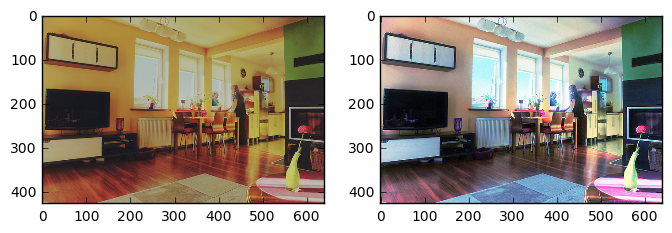

In [21]:
img = cv2.cvtColor(cv2.imread("/data/***/val2014/COCO_val2014_000000000139.jpg"), cv2.COLOR_BGR2RGB)
norm = np.ones(img.shape, img.dtype)*255
norm[:,:,0] = cv2.equalizeHist(img[:,:,0])
norm[:,:,1] = cv2.equalizeHist(img[:,:,1])
norm[:,:,2] = cv2.equalizeHist(img[:,:,2])


mat1 = [
    [
        lambda x: plt.imshow(img),
        lambda x: plt.imshow(norm),
    ]
]

mtx_plot(mat1, ratio=(4,3))


# prediction

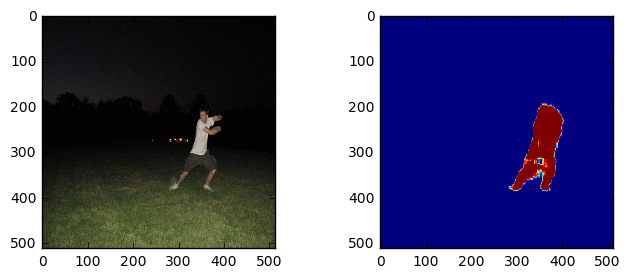

In [43]:
import keras.backend as  K
from keras.models import model_from_json
import skimage.io as io
from model_unet import create_unet
folder = "/data/***/"
'''
2017-04-28-03-34-49_fil64_adam_lr0.0001_glorot_uniform_dice_coef_weights.epoch0000-val_loss-0.59-val_dice_coef0.59.hdf5
2017-04-28-03-34-49_fil64_adam_lr0.0001_glorot_uniform_dice_coef_weights.epoch0001-val_loss-0.61-val_dice_coef0.61.hdf5
2017-04-28-03-34-49_fil64_adam_lr0.0001_glorot_uniform_dice_coef_weights.epoch0002-val_loss-0.65-val_dice_coef0.65.hdf5
COCO_val2014_000000000589
COCO_val2014_000000000139
COCO_val2014_000000000257
COCO_val2014_000000000283
COCO_val2014_000000000328
COCO_val2014_000000000338
COCO_val2014_000000000357
'''

img = io.imread(folder+"val2014/COCO_val2014_000000000589.jpg")
img = cv2.resize(img, (512, 512))
img = np.expand_dims(img, axis=0)

with K.tf.device('/cpu:0'):
        model = create_unet((512, 512, 3), 1, 64)
        model.load_weights(folder+"2017-04-28-03-34-49_fil64_adam_lr0.0001_glorot_uniform_dice_coef_weights.epoch0002-val_loss-0.65-val_dice_coef0.65.hdf5")
        
        output = model.predict(img)




mat1 = [
    [
        lambda x: plt.imshow(img[0]),
        lambda x: plt.imshow(output[0]),
    ]
]

mtx_plot(mat1, ratio=(4,3))